# COVID-19 Global Impact Analysis

In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("CovidData.csv")
df.head(5)

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  24-02-2020          1.0        1.0   
1      AFG      Asia  Afghanistan  25-02-2020          1.0        0.0   
2      AFG      Asia  Afghanistan  26-02-2020          1.0        0.0   
3      AFG      Asia  Afghanistan  27-02-2020          1.0        0.0   
4      AFG      Asia  Afghanistan  28-02-2020          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.511  
1                         0.5            64.83                    0.511  
2                         0.5            64.83                    0.511  
3                         0.5            64.83                    0.511  
4                         0.5            64.83                    0.511  

[5 rows x 59 columns]

## COVID-19 Global Impact Analysis: Cases & Deaths

In [7]:
df_cleaned = df[(df['continent'].notna()) & (df['continent'] != '')]
df_cleaned

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  24-02-2020          1.0        1.0   
1          AFG      Asia  Afghanistan  25-02-2020          1.0        0.0   
2          AFG      Asia  Afghanistan  26-02-2020          1.0        0.0   
3          AFG      Asia  Afghanistan  27-02-2020          1.0        0.0   
4          AFG      Asia  Afghanistan  28-02-2020          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
85166      ZWE    Africa     Zimbabwe  26-04-2021      38102.0       16.0   
85167      ZWE    Africa     Zimbabwe  27-04-2021      38164.0       62.0   
85168      ZWE    Africa     Zimbabwe  28-04-2021      38191.0       27.0   
85169      ZWE    Africa     Zimbabwe  29-04-2021      38235.0       44.0   
85170      ZWE    Africa     Zimbabwe  30-04-2021      38257.0       22.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         NaN                  NaN  ...   
1                     NaN           NaN         NaN                  NaN  ...   
2                     NaN           NaN         NaN                  NaN  ...   
3                     NaN           NaN         NaN                  NaN  ...   
4                     NaN           NaN         NaN                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
85166              34.714        1560.0         3.0                1.000  ...   
85167              41.286        1565.0         5.0                1.571  ...   
85168              30.143        1565.0         0.0                1.429  ...   
85169              31.000        1567.0         2.0                1.714  ...   
85170              30.286        1567.0         0.0                1.571  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
85166        1899.775             21.4                307.846   
85167        1899.775             21.4                307.846   
85168        1899.775             21.4                307.846   
85169        1899.775             21.4                307.846   
85170        1899.775             21.4                307.846   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
85166                 1.82             1.6          30.7   
85167                 1.82             1.6          30.7   
85168                 1.82             1.6          30.7   
85169                 1.82             1.6          30.7   
85170                 1.82             1.6          30.7   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
85166                  36.791                         1.7   

In [8]:
cases_deaths = df_cleaned.groupby(['location'])[['new_cases', 'new_deaths']].sum().reset_index()
cases_deaths.columns = ['Country','Cases','Deaths']
cases_deaths

Country     Cases  Deaths
0    Afghanistan   59745.0  2625.0
1        Albania  131085.0  2394.0
2        Algeria  122108.0  3253.0
3        Andorra   13232.0   125.0
4         Angola   26652.0   596.0
..           ...       ...     ...
205    Venezuela  197683.0  2136.0
206      Vietnam    2928.0    35.0
207        Yemen    6317.0  1226.0
208       Zambia   91586.0  1251.0
209     Zimbabwe   38257.0  1567.0

[210 rows x 3 columns]

## Top 20 Countries by Total COVID-19 Cases

In [9]:
cases = cases_deaths.nlargest(20,'Cases')
cases = cases[['Country', 'Cases']]
cases = cases.reset_index(drop=True)
cases

Country       Cases
0    United States  32346970.0
1            India  19164969.0
2           Brazil  14659011.0
3           France   5677835.0
4           Russia   4750755.0
5   United Kingdom   4432246.0
6            Italy   4022653.0
7           Turkey   3997366.0
8            Spain   3524077.0
9          Germany   3405365.0
10       Argentina   2977363.0
11        Colombia   2859724.0
12          Poland   2792142.0
13            Iran   2499077.0
14          Mexico   2344755.0
15         Ukraine   2124070.0
16            Peru   1799445.0
17       Indonesia   1668368.0
18         Czechia   1630758.0
19    South Africa   1581210.0

## Top 20 Countries with highest Covid-19 death toll

In [10]:
deaths = cases_deaths.nlargest(20,'Deaths')
deaths = deaths[['Country','Deaths']]
deaths = deaths.reset_index(drop=True)
deaths

Country    Deaths
0    United States  576232.0
1           Brazil  403781.0
2           Mexico  216907.0
3            India  211853.0
4   United Kingdom  127775.0
5            Italy  120807.0
6           Russia  108290.0
7           France  104675.0
8          Germany   83097.0
9            Spain   78216.0
10        Colombia   73720.0
11            Iran   71758.0
12          Poland   67502.0
13       Argentina   63865.0
14            Peru   61477.0
15    South Africa   54350.0
16         Ukraine   45923.0
17       Indonesia   45521.0
18          Turkey   40131.0
19         Czechia   29267.0

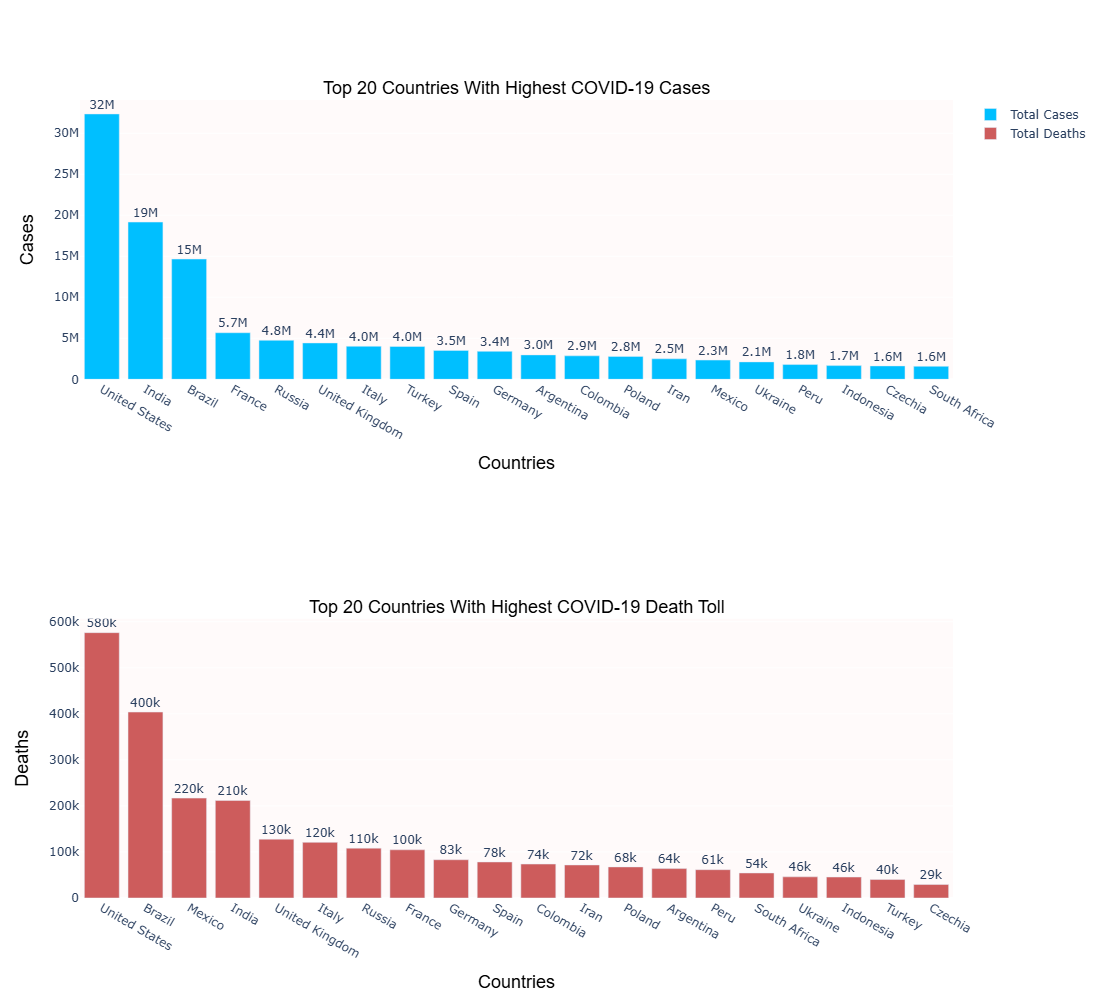

In [11]:
fig = make_subplots(rows=2, cols=1,
                    vertical_spacing=0.3,
                    subplot_titles=("Top 20 Countries With Highest COVID-19 Cases",
                                     "Top 20 Countries With Highest COVID-19 Death Toll"))

fig.add_trace(go.Bar(x=cases['Country'],
                     y=cases['Cases'],
                    name='Total Cases',
                    marker_color="deepskyblue",
                    text=cases['Cases']),
              row=1,col=1)

fig.add_trace(go.Bar(x=deaths['Country'],
                     y=deaths['Deaths'],
                    name='Total Deaths',
                    marker_color="indianred",
                    text=deaths['Deaths']),
             row=2,col=1)

fig.update_layout(height=1000,
                  plot_bgcolor='Snow',
                  xaxis_title=dict(text='Countries',font=dict(size=18,color='black',family='Arial')),
                  xaxis2_title=dict(text='Countries',font=dict(size=18,color='Black',family='Arial')),
                  yaxis_title=dict(text='Cases',font=dict(size=18,color='black',family='Arial')),
                  yaxis2_title=dict(text='Deaths',font=dict(size=18,color='black',family='Arial')))

fig.update_traces(texttemplate='%{text:.2s}',
                 textposition='outside')

for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=18, color='black', family='Arial')

fig.show()
              

## Covid-19 Cases and Deaths Across Continents

In [12]:
continent_cases_deaths = df.groupby(['continent'])[['new_cases','new_deaths']].sum().reset_index()
continent_cases_deaths.columns = ['Continents','Cases','Deaths']
continent_cases_deaths

Continents       Cases     Deaths
0         Africa   4557699.0   121784.0
1           Asia  38702527.0   520269.0
2         Europe  44863478.0  1016750.0
3  North America  37529487.0   847942.0
4        Oceania     43570.0     1046.0
5  South America  24878216.0   672415.0

### Covid-19 Cases across Continents

In [13]:
continent_cases = continent_cases_deaths[['Continents','Cases']]
continent_cases

Continents       Cases
0         Africa   4557699.0
1           Asia  38702527.0
2         Europe  44863478.0
3  North America  37529487.0
4        Oceania     43570.0
5  South America  24878216.0

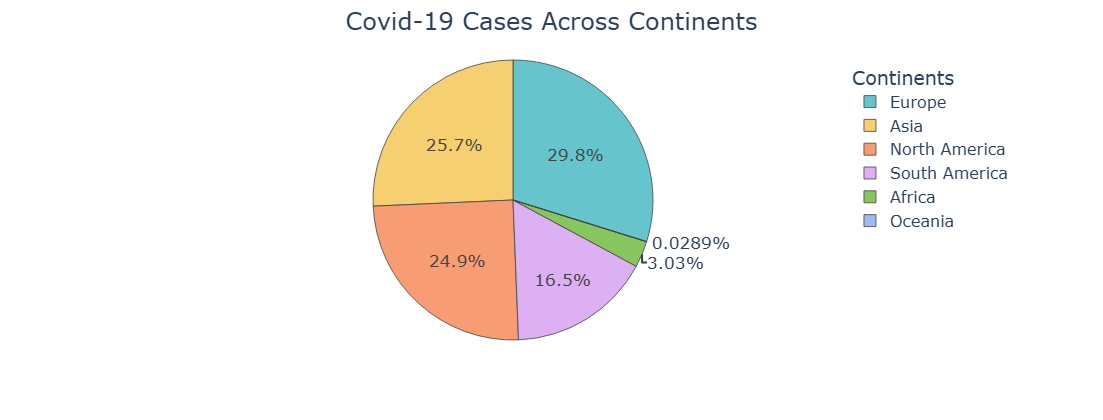

In [14]:
fig1 = px.pie(continent_cases, 
       names='Continents',
       values='Cases',
       color_discrete_sequence=px.colors.qualitative.Pastel)

fig1.update_layout(title="Covid-19 Cases Across Continents",
                   title_x=0.5,
                   title_font_size=24,
                   legend_title='Continents',
                   legend_font_size=16,
                   height=420
                  )

fig1.update_traces(marker=dict(line=dict(width=0.8)),
                   textfont_size=17)

fig1.show()

## Percentage Distribution Of Deaths due to Covid across Continents 

In [15]:
continent_deaths = continent_cases_deaths[['Continents','Deaths']]
continent_deaths

Continents     Deaths
0         Africa   121784.0
1           Asia   520269.0
2         Europe  1016750.0
3  North America   847942.0
4        Oceania     1046.0
5  South America   672415.0

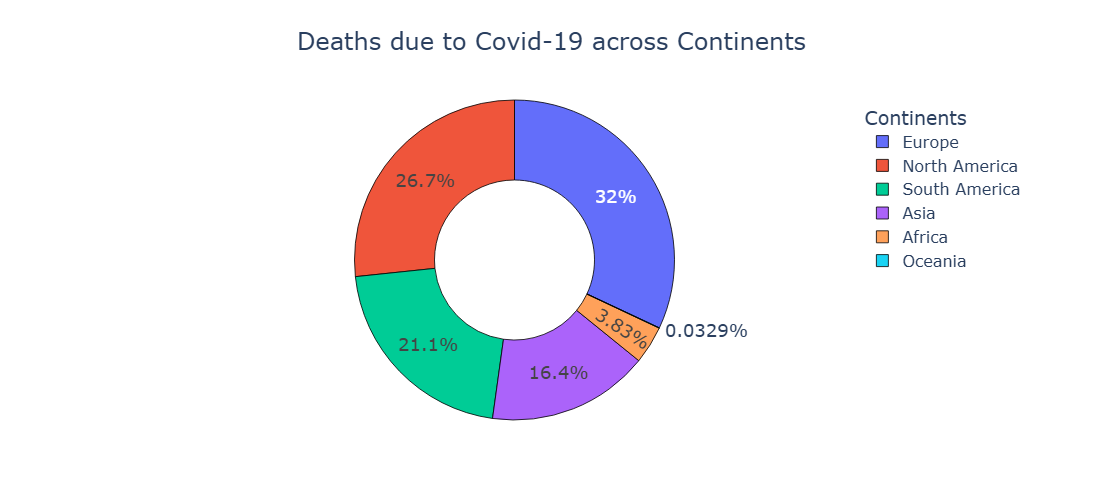

In [16]:
fig2 = px.pie(continent_deaths,
              names='Continents',
              values='Deaths',
              title='Deaths due to Covid-19 across Continents',hole=0.5)

fig2.update_layout(title_x=0.5,
                   height=500,
                  title_font_size=24,
                  legend_title='Continents',
                  legend_font_size=16)

fig2.update_traces(textfont_size=18,
                  marker=dict(line=dict(width=0.8,color='black')))

fig2.show()

## Covid-19 Cases and Deaths across Asia

In [17]:
asia_df = df[df['continent']=='Asia']
asia_df

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  24-02-2020          1.0        1.0   
1          AFG      Asia  Afghanistan  25-02-2020          1.0        0.0   
2          AFG      Asia  Afghanistan  26-02-2020          1.0        0.0   
3          AFG      Asia  Afghanistan  27-02-2020          1.0        0.0   
4          AFG      Asia  Afghanistan  28-02-2020          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
84350      YEM      Asia        Yemen  26-04-2021       6183.0       46.0   
84351      YEM      Asia        Yemen  27-04-2021       6220.0       37.0   
84352      YEM      Asia        Yemen  28-04-2021       6263.0       43.0   
84353      YEM      Asia        Yemen  29-04-2021       6294.0       31.0   
84354      YEM      Asia        Yemen  30-04-2021       6317.0       23.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         NaN                  NaN  ...   
1                     NaN           NaN         NaN                  NaN  ...   
2                     NaN           NaN         NaN                  NaN  ...   
3                     NaN           NaN         NaN                  NaN  ...   
4                     NaN           NaN         NaN                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
84350              46.429        1205.0        18.0               10.429  ...   
84351              43.143        1207.0         2.0                9.857  ...   
84352              43.286        1216.0         9.0                9.857  ...   
84353              39.143        1222.0         6.0                9.286  ...   
84354              37.286        1226.0         4.0                8.714  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
84350        1479.147             18.8                495.003   
84351        1479.147             18.8                495.003   
84352        1479.147             18.8                495.003   
84353        1479.147             18.8                495.003   
84354        1479.147             18.8                495.003   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
84350                 5.35             7.6          29.2   
84351                 5.35             7.6          29.2   
84352                 5.35             7.6          29.2   
84353                 5.35             7.6          29.2   
84354                 5.35             7.6          29.2   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
84350                  49.542                         0.7   

In [19]:
cases_deaths_asia = asia_df.groupby(['location'])[['new_cases','new_deaths']].sum().reset_index()
cases_deaths_asia.columns = ['Country','Cases','Deaths']
cases_deaths_asia

Country       Cases    Deaths
0            Afghanistan     59745.0    2625.0
1                Armenia    216064.0    4108.0
2             Azerbaijan    319109.0    4517.0
3                Bahrain    176934.0     646.0
4             Bangladesh    759132.0   11450.0
5                 Bhutan      1074.0       1.0
6                 Brunei       224.0       3.0
7               Cambodia     13402.0      93.0
8                  China    101946.0    4828.0
9                Georgia    310310.0    4110.0
10             Hong Kong         0.0       0.0
11                 India  19164969.0  211853.0
12             Indonesia   1668368.0   45521.0
13                  Iran   2499077.0   71758.0
14                  Iraq   1065199.0   15465.0
15                Israel    838481.0    6363.0
16                 Japan    593262.0   10199.0
17                Jordan    711373.0    8836.0
18            Kazakhstan    375539.0    3334.0
19                Kuwait    273991.0    1563.0
20            Kyrgyzstan     95275.0    1604.0
21                  Laos       757.0       0.0
22               Lebanon    526578.0    7278.0
23                 Macao         0.0       0.0
24              Malaysia    408713.0    1506.0
25              Maldives     29835.0      73.0
26              Mongolia     37285.0     115.0
27               Myanmar    142817.0    3209.0
28                 Nepal    323187.0    3279.0
29       Northern Cyprus         0.0       0.0
30                  Oman    193253.0    2010.0
31              Pakistan    825519.0   17957.0
32             Palestine    296462.0    3249.0
33           Philippines   1037460.0   17234.0
34                 Qatar    205652.0     458.0
35          Saudi Arabia    417363.0    6957.0
36             Singapore     61145.0      30.0
37           South Korea    122633.0    1831.0
38             Sri Lanka    108146.0     678.0
39                 Syria     22733.0    1592.0
40                Taiwan      1127.0      12.0
41            Tajikistan     13308.0      90.0
42              Thailand     65149.0     203.0
43                 Timor      2276.0       3.0
44                Turkey   3997366.0   40131.0
45  United Arab Emirates    520236.0    1587.0
46            Uzbekistan     90808.0     649.0
47               Vietnam      2928.0      35.0
48                 Yemen      6317.0    1226.0

## Top 20 Asian Countries with maximum Covid-19 Cases

In [20]:
cases_asia = cases_deaths_asia[['Country','Cases']]
cases_asia = cases_asia.nlargest(20,'Cases')
cases_asia = cases_asia.reset_index(drop=True)
cases_asia

Country       Cases
0                  India  19164969.0
1                 Turkey   3997366.0
2                   Iran   2499077.0
3              Indonesia   1668368.0
4                   Iraq   1065199.0
5            Philippines   1037460.0
6                 Israel    838481.0
7               Pakistan    825519.0
8             Bangladesh    759132.0
9                 Jordan    711373.0
10                 Japan    593262.0
11               Lebanon    526578.0
12  United Arab Emirates    520236.0
13          Saudi Arabia    417363.0
14              Malaysia    408713.0
15            Kazakhstan    375539.0
16                 Nepal    323187.0
17            Azerbaijan    319109.0
18               Georgia    310310.0
19             Palestine    296462.0

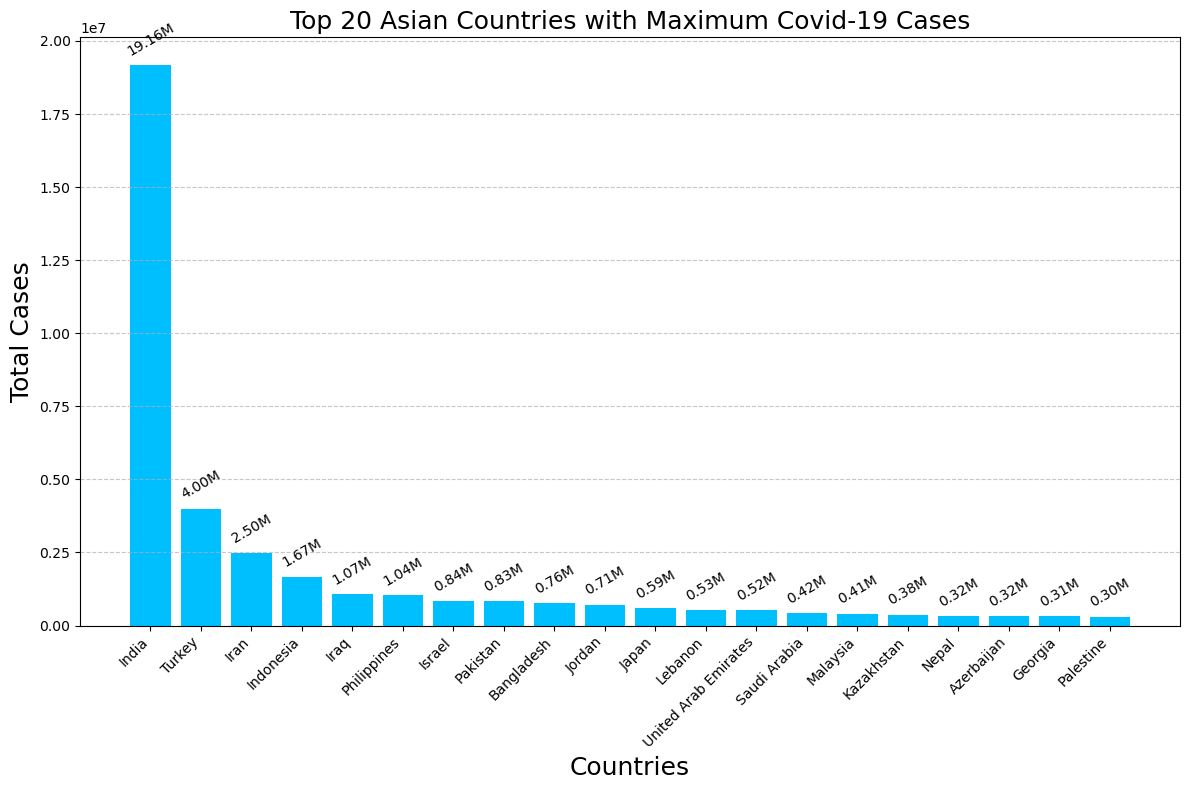

In [21]:
plt.figure(figsize=(12,8))
bars=plt.bar(cases_asia['Country'],cases_asia['Cases'],color="deepskyblue")
plt.xticks(rotation=45,ha='right')
plt.title("Top 20 Asian Countries with Maximum Covid-19 Cases",fontsize=18)
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Total Cases",fontsize=18)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars,labels=[f'{val/1e6:.2f}M' for val in cases_asia['Cases']], fontsize=10,padding=5,rotation=30)
plt.show()

## Top 20 Asian Countries with maximum Deaths due to Covid-19

In [22]:
deaths_asia = cases_deaths_asia[['Country','Deaths']]
deaths_asia = deaths_asia.nlargest(20,'Deaths')
deaths_asia = deaths_asia.reset_index(drop=True)
deaths_asia

Country    Deaths
0          India  211853.0
1           Iran   71758.0
2      Indonesia   45521.0
3         Turkey   40131.0
4       Pakistan   17957.0
5    Philippines   17234.0
6           Iraq   15465.0
7     Bangladesh   11450.0
8          Japan   10199.0
9         Jordan    8836.0
10       Lebanon    7278.0
11  Saudi Arabia    6957.0
12        Israel    6363.0
13         China    4828.0
14    Azerbaijan    4517.0
15       Georgia    4110.0
16       Armenia    4108.0
17    Kazakhstan    3334.0
18         Nepal    3279.0
19     Palestine    3249.0

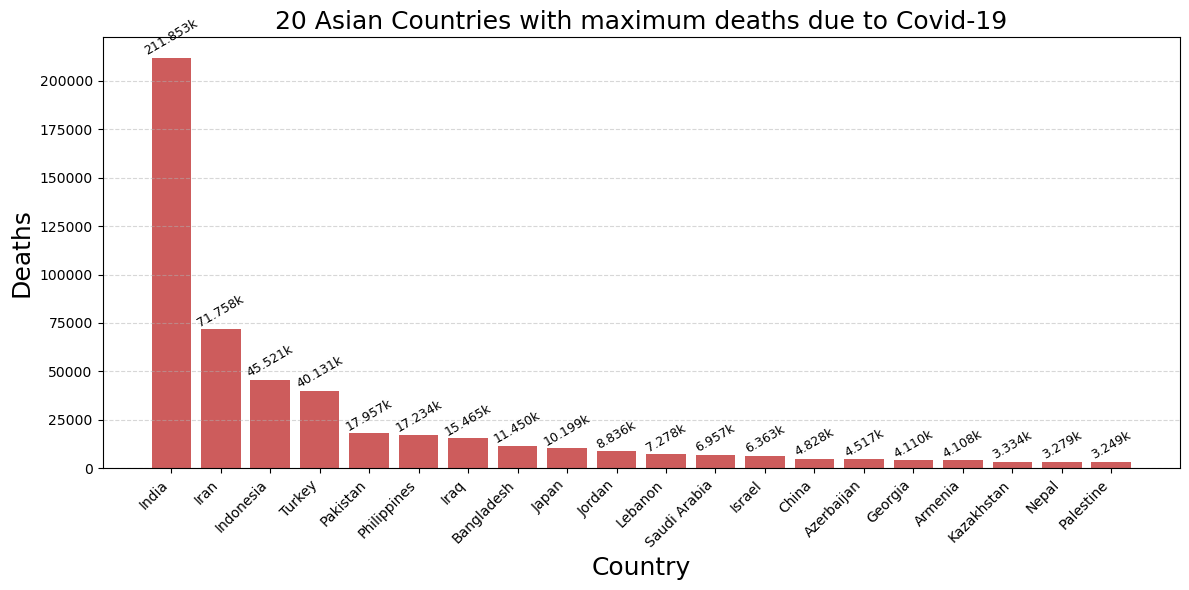

In [23]:
plt.figure(figsize=(12,6))
bars=plt.bar(deaths_asia['Country'],deaths_asia['Deaths'],color="indianred")
plt.title("20 Asian Countries with maximum deaths due to Covid-19",fontsize=18)
plt.xlabel("Country",fontsize=18)
plt.ylabel("Deaths",fontsize=18)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.bar_label(bars, labels=[f'{val/1e3:.3f}k' for val in deaths_asia['Deaths']], fontsize=9,rotation=30)
plt.show()

## Covid-19 cases and deaths analysis in Asia

In [24]:
asia_df2 = df[df['continent']=='Asia'].copy()
asia_df2

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  24-02-2020          1.0        1.0   
1          AFG      Asia  Afghanistan  25-02-2020          1.0        0.0   
2          AFG      Asia  Afghanistan  26-02-2020          1.0        0.0   
3          AFG      Asia  Afghanistan  27-02-2020          1.0        0.0   
4          AFG      Asia  Afghanistan  28-02-2020          1.0        0.0   
...        ...       ...          ...         ...          ...        ...   
84350      YEM      Asia        Yemen  26-04-2021       6183.0       46.0   
84351      YEM      Asia        Yemen  27-04-2021       6220.0       37.0   
84352      YEM      Asia        Yemen  28-04-2021       6263.0       43.0   
84353      YEM      Asia        Yemen  29-04-2021       6294.0       31.0   
84354      YEM      Asia        Yemen  30-04-2021       6317.0       23.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         NaN                  NaN  ...   
1                     NaN           NaN         NaN                  NaN  ...   
2                     NaN           NaN         NaN                  NaN  ...   
3                     NaN           NaN         NaN                  NaN  ...   
4                     NaN           NaN         NaN                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
84350              46.429        1205.0        18.0               10.429  ...   
84351              43.143        1207.0         2.0                9.857  ...   
84352              43.286        1216.0         9.0                9.857  ...   
84353              39.143        1222.0         6.0                9.286  ...   
84354              37.286        1226.0         4.0                8.714  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
84350        1479.147             18.8                495.003   
84351        1479.147             18.8                495.003   
84352        1479.147             18.8                495.003   
84353        1479.147             18.8                495.003   
84354        1479.147             18.8                495.003   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
84350                 5.35             7.6          29.2   
84351                 5.35             7.6          29.2   
84352                 5.35             7.6          29.2   
84353                 5.35             7.6          29.2   
84354                 5.35             7.6          29.2   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
84350                  49.542                         0.7   

In [25]:
asia_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20234 entries, 0 to 84354
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               20234 non-null  object 
 1   continent                              20234 non-null  object 
 2   location                               20234 non-null  object 
 3   date                                   20234 non-null  object 
 4   total_cases                            19882 non-null  float64
 5   new_cases                              19876 non-null  float64
 6   new_cases_smoothed                     19647 non-null  float64
 7   total_deaths                           16864 non-null  float64
 8   new_deaths                             16863 non-null  float64
 9   new_deaths_smoothed                    19647 non-null  float64
 10  total_cases_per_million                19882 non-null  float64
 11  new_cas

In [26]:
asia_df2['date'] = pd.to_datetime(asia_df2['date'],format='%d-%m-%Y')
asia_df2['Month-Year'] = asia_df2['date'].dt.to_period('M').astype(str)
asia_monthly_cases_deaths = asia_df2.groupby(['Month-Year'])[['new_cases','new_deaths']].sum().reset_index()
asia_monthly_cases_deaths.rename(columns={'new_cases':'Cases','new_deaths':'Deaths'},inplace=True)
asia_monthly_cases_deaths

Month-Year       Cases   Deaths
0     2020-01      9333.0    196.0
1     2020-02     73831.0   2691.0
2     2020-03     95313.0   4232.0
3     2020-04    341931.0  11570.0
4     2020-05    617814.0  12125.0
5     2020-06   1166426.0  26152.0
6     2020-07   1991314.0  39743.0
7     2020-08   2817359.0  45881.0
8     2020-09   3554777.0  52510.0
9     2020-10   3045973.0  48211.0
10    2020-11   3076661.0  48833.0
11    2020-12   3080524.0  45251.0
12    2021-01   2418244.0  35832.0
13    2021-02   1908902.0  25497.0
14    2021-03   3484950.0  29353.0
15    2021-04  11019175.0  92192.0

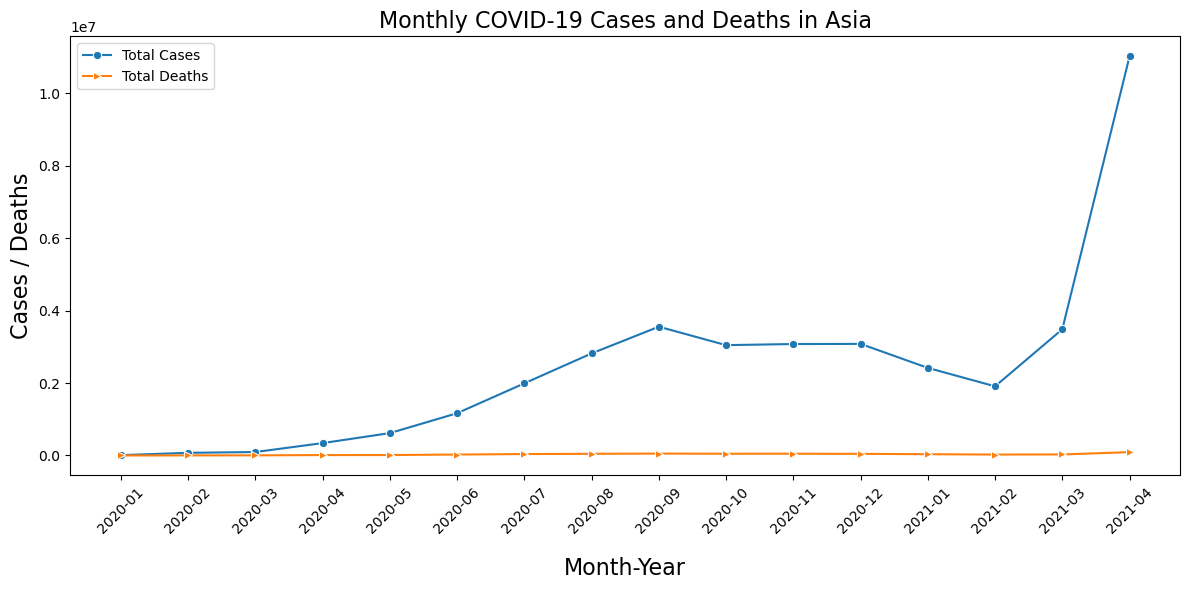

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(asia_monthly_cases_deaths,
             x='Month-Year',
             y='Cases',
            marker='o',
            label='Total Cases')

sns.lineplot(asia_monthly_cases_deaths,
             x='Month-Year',
             y='Deaths',
            marker='>',
            label='Total Deaths')

plt.title('Monthly COVID-19 Cases and Deaths in Asia',fontsize=16)
plt.xlabel('Month-Year',fontsize=16,labelpad=15)
plt.xticks(rotation=45)
plt.ylabel('Cases / Deaths',fontsize=16)
plt.tight_layout()
plt.show()

## Deaths due to Covid in Asia

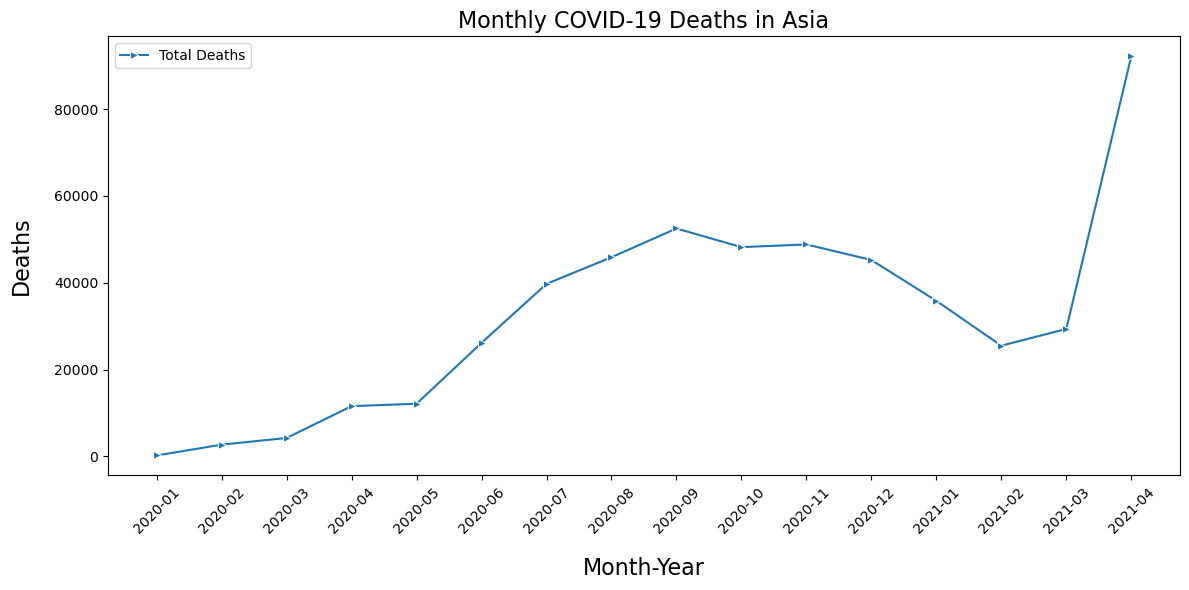

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(asia_monthly_cases_deaths,
             x='Month-Year',
             y='Deaths',
            marker='>',
            label='Total Deaths')

plt.title('Monthly COVID-19 Deaths in Asia',fontsize=16)
plt.xlabel('Month-Year',fontsize=16,labelpad=15)
plt.xticks(rotation=45)
plt.ylabel('Deaths',fontsize=16,labelpad=15)
plt.tight_layout()
plt.show()

## Covid-19 cases and deaths analysis in India 

In [29]:
india_df = df[df['location']=='India'].copy()
india_df

iso_code continent location        date  total_cases  new_cases  \
35021      IND      Asia    India  30-01-2020          1.0        1.0   
35022      IND      Asia    India  31-01-2020          1.0        0.0   
35023      IND      Asia    India  01-02-2020          1.0        0.0   
35024      IND      Asia    India  02-02-2020          2.0        1.0   
35025      IND      Asia    India  03-02-2020          3.0        1.0   
...        ...       ...      ...         ...          ...        ...   
35473      IND      Asia    India  26-04-2021   17636186.0   323023.0   
35474      IND      Asia    India  27-04-2021   17997113.0   360927.0   
35475      IND      Asia    India  28-04-2021   18376421.0   379308.0   
35476      IND      Asia    India  29-04-2021   18762976.0   386555.0   
35477      IND      Asia    India  30-04-2021   19164969.0   401993.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
35021                 NaN           NaN         NaN                  NaN  ...   
35022                 NaN           NaN         NaN                  NaN  ...   
35023                 NaN           NaN         NaN                  NaN  ...   
35024                 NaN           NaN         NaN                  NaN  ...   
35025                 NaN           NaN         NaN                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
35473          330744.857      197894.0      2771.0             2480.571  ...   
35474          340140.429      201187.0      3293.0             2662.000  ...   
35475          349378.143      204832.0      3645.0             2882.143  ...   
35476          357040.143      208330.0      3498.0             3058.571  ...   
35477          364926.857      211853.0      3523.0             3187.000  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
35021        6426.674             21.2                 282.28   
35022        6426.674             21.2                 282.28   
35023        6426.674             21.2                 282.28   
35024        6426.674             21.2                 282.28   
35025        6426.674             21.2                 282.28   
...               ...              ...                    ...   
35473        6426.674             21.2                 282.28   
35474        6426.674             21.2                 282.28   
35475        6426.674             21.2                 282.28   
35476        6426.674             21.2                 282.28   
35477        6426.674             21.2                 282.28   

       diabetes_prevalence  female_smokers  male_smokers  \
35021                10.39             1.9          20.6   
35022                10.39             1.9          20.6   
35023                10.39             1.9          20.6   
35024                10.39             1.9          20.6   
35025                10.39             1.9          20.6   
...                    ...             ...           ...   
35473                10.39             1.9          20.6   
35474                10.39             1.9          20.6   
35475                10.39             1.9          20.6   
35476                10.39             1.9          20.6   
35477                10.39             1.9          20.6   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
35021                   59.55                        0.53            69.66   
35022                   59.55                        0.53            69.66   
35023                   59.55                        0.53            69.66   
35024                   59.55                        0.53            69.66   
35025                   59.55                        0.53            69.66   
...                       ...                         ...              ...   
35473                   59.55                        0.53            69.66   
35474                   59.55 

In [30]:
india_df['date']=pd.to_datetime(india_df['date'],format='%d-%m-%Y')
india_df['month-year'] = india_df['date'].dt.to_period('M').astype(str)
india_cases_deaths = india_df.groupby(['month-year'])[['new_cases','new_deaths']].sum().reset_index()
india_cases_deaths.columns = ['Month-Year','Cases','Deaths']
india_cases_deaths

Month-Year      Cases   Deaths
0     2020-01        1.0      0.0
1     2020-02        2.0      0.0
2     2020-03     1394.0     35.0
3     2020-04    33466.0   1119.0
4     2020-05   155746.0   4254.0
5     2020-06   394872.0  11992.0
6     2020-07  1110507.0  19111.0
7     2020-08  1995178.0  28777.0
8     2020-09  2621418.0  33390.0
9     2020-10  1871498.0  23433.0
10    2020-11  1278727.0  15510.0
11    2020-12   803865.0  11117.0
12    2021-01   490936.0   5654.0
13    2021-02   354631.0   2765.0
14    2021-03  1109424.0   5770.0
15    2021-04  6943304.0  48926.0

In [31]:
india_cases_deaths['Month-Year'] = pd.to_datetime(india_cases_deaths['Month-Year'])


## Covid Cases verses Deaths in India

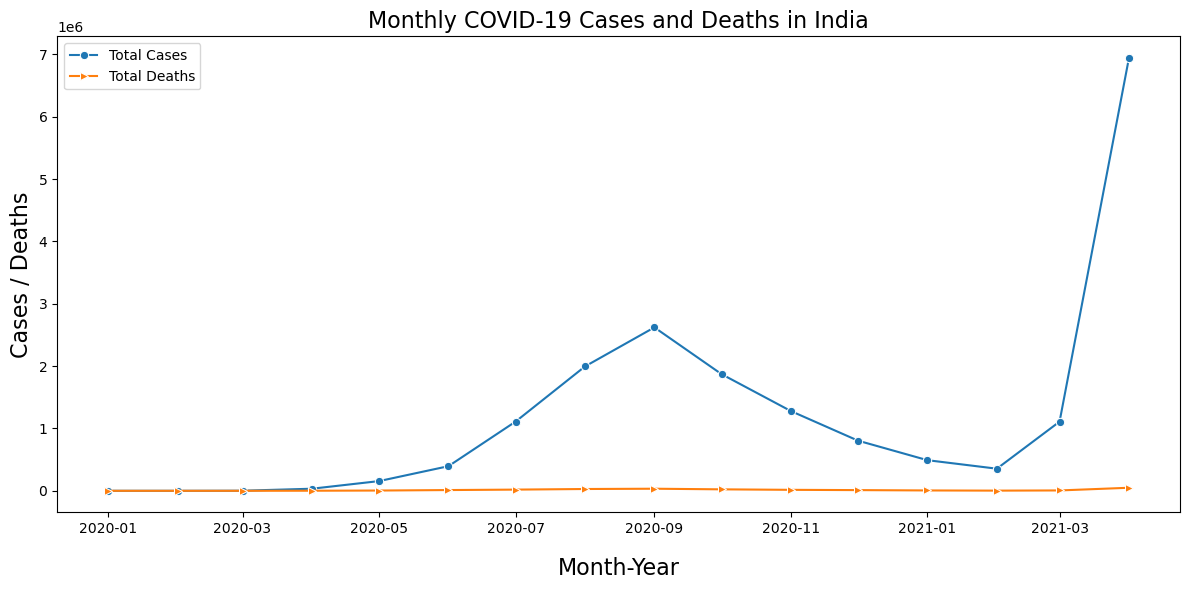

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(india_cases_deaths,
             x='Month-Year',
             y='Cases',
            marker='o',
            label='Total Cases')

sns.lineplot(india_cases_deaths,
             x='Month-Year',
             y='Deaths',
            marker='>',
            label='Total Deaths')

plt.title('Monthly COVID-19 Cases and Deaths in India',fontsize=16)
plt.xlabel('Month-Year',fontsize=16,labelpad=15)
plt.ylabel('Cases / Deaths',fontsize=16)
plt.tight_layout()
plt.show()

## Deaths due to Covid in India

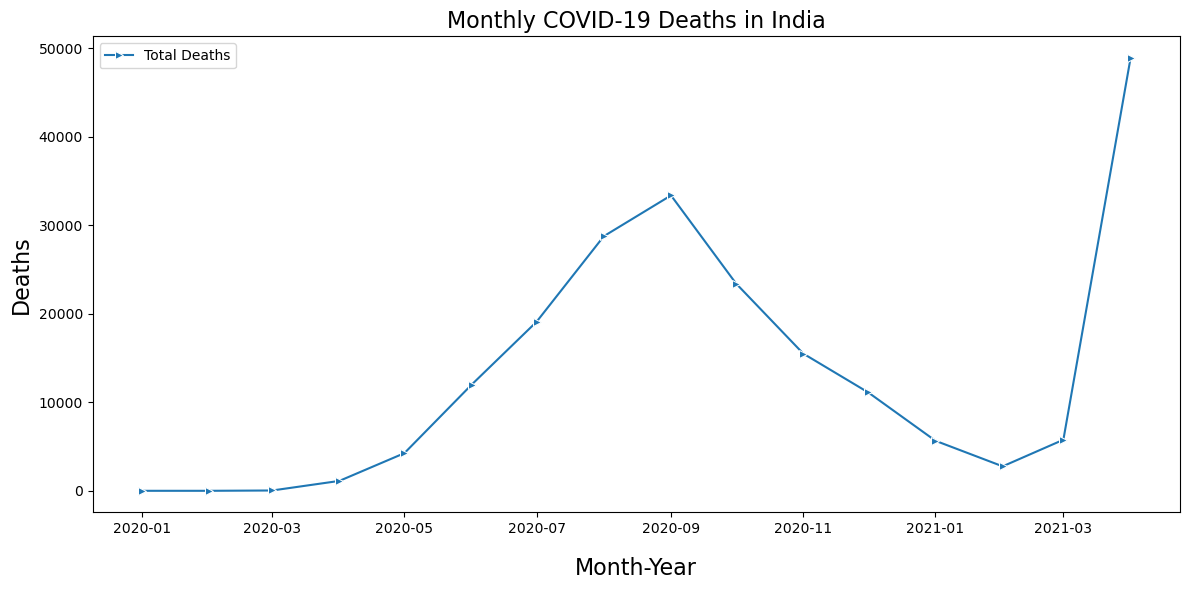

In [33]:
plt.figure(figsize=(12,6))
sns.lineplot(india_cases_deaths,
             x='Month-Year',
             y='Deaths',
            marker='>',
            label='Total Deaths')

plt.title('Monthly COVID-19 Deaths in India',fontsize=16)
plt.xlabel('Month-Year',fontsize=16,labelpad=15)
plt.ylabel('Deaths',fontsize=16)
plt.tight_layout()


# Covid-19 Tests and Vaccinations 

In [34]:
df2=pd.read_csv("CovidTestingVaccinations.csv")
df2.head(5)

iso_code continent     location        date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan  24-02-2020        NaN          NaN   
1      AFG      Asia  Afghanistan  25-02-2020        NaN          NaN   
2      AFG      Asia  Afghanistan  26-02-2020        NaN          NaN   
3      AFG      Asia  Afghanistan  27-02-2020        NaN          NaN   
4      AFG      Asia  Afghanistan  28-02-2020        NaN          NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_thousand  ...  gdp_per_capita  extreme_poverty  \
0                              NaN  ...        1803.987              NaN   
1                              NaN  ...        1803.987              NaN   
2                              NaN  ...        1803.987              NaN   
3                              NaN  ...        1803.987              NaN   
4                              NaN  ...        1803.987              NaN   

  cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0               597.029                 9.59             NaN           NaN   
1               597.029                 9.59             NaN           NaN   
2               597.029                 9.59             NaN           NaN   
3               597.029                 9.59             NaN           NaN   
4               597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  
0                    0.511  
1                    0.511  
2                    0.511  
3                    0.511  
4                    0.511  

[5 rows x 37 columns]

In [35]:
df2_cleaned = df2[(df2['continent'].notna()) & (df2['continent'] != '')]
df2_cleaned

iso_code continent     location        date  new_tests  total_tests  \
0          AFG      Asia  Afghanistan  24-02-2020        NaN          NaN   
1          AFG      Asia  Afghanistan  25-02-2020        NaN          NaN   
2          AFG      Asia  Afghanistan  26-02-2020        NaN          NaN   
3          AFG      Asia  Afghanistan  27-02-2020        NaN          NaN   
4          AFG      Asia  Afghanistan  28-02-2020        NaN          NaN   
...        ...       ...          ...         ...        ...          ...   
85166      ZWE    Africa     Zimbabwe  26-04-2021     1495.0     484446.0   
85167      ZWE    Africa     Zimbabwe  27-04-2021     2355.0     486801.0   
85168      ZWE    Africa     Zimbabwe  28-04-2021     2025.0     488826.0   
85169      ZWE    Africa     Zimbabwe  29-04-2021        NaN          NaN   
85170      ZWE    Africa     Zimbabwe  30-04-2021        NaN          NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                           NaN                     NaN                 NaN   
1                           NaN                     NaN                 NaN   
2                           NaN                     NaN                 NaN   
3                           NaN                     NaN                 NaN   
4                           NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
85166                    32.594                   0.101              1722.0   
85167                    32.753                   0.158              1703.0   
85168                    32.889                   0.136              1716.0   
85169                       NaN                     NaN                 NaN   
85170                       NaN                     NaN                 NaN   

       new_tests_smoothed_per_thousand  ...  gdp_per_capita  extreme_poverty  \
0                                  NaN  ...        1803.987              NaN   
1                                  NaN  ...        1803.987              NaN   
2                                  NaN  ...        1803.987              NaN   
3                                  NaN  ...        1803.987              NaN   
4                                  NaN  ...        1803.987              NaN   
...                                ...  ...             ...              ...   
85166                            0.116  ...        1899.775             21.4   
85167                            0.115  ...        1899.775             21.4   
85168                            0.115  ...        1899.775             21.4   
85169                              NaN  ...        1899.775             21.4   
85170                              NaN  ...        1899.775             21.4   

      cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
0                   597.029                 9.59             NaN   
1                   597.029                 9.59             NaN   
2                   597.029                 9.59             NaN   
3                   597.029                 9.59             NaN   
4                   597.029                 9.59             NaN   
...                     ...                  ...             ...   
85166               307.846                 1.82             1.6   
85167               307.846                 1.82             1.6   
85168               307.846                 1.82             1.6   
85169               307.846                 1.82             1.6   
85170               307.846                 1.82             1.6   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0               NaN                  37.746                         0.5   
1               NaN                  37.746                         0.5   
2               NaN                  37.746                         0.5   
3               NaN                  37.746           

In [36]:
tests_vaccinations = df2_cleaned.groupby(['location'])[['total_tests','total_vaccinations']].last().reset_index()
tests_vaccinations.columns = ['Country','Tests','Vaccinations']
tests_vaccinations

Country      Tests  Vaccinations
0    Afghanistan        NaN      240000.0
1        Albania   610865.0      476903.0
2        Algeria        NaN       75000.0
3        Andorra   180633.0       26414.0
4         Angola        NaN      456349.0
..           ...        ...           ...
205    Venezuela        NaN      250000.0
206      Vietnam  2482302.0      506435.0
207        Yemen        NaN           NaN
208       Zambia  1394900.0       26580.0
209     Zimbabwe   488826.0      500342.0

[210 rows x 3 columns]

## Top 20 Countries that conducted Maximum Covid Tests

In [37]:
tests = tests_vaccinations.nlargest(20,'Tests')
tests = tests[['Country','Tests']]
tests = tests.reset_index(drop=True)
tests

Country        Tests
0          United States  413502739.0
1                  India  286392086.0
2                  China  160000000.0
3         United Kingdom  151516625.0
4                 Russia  129182804.0
5                  Italy   58240981.0
6                Germany   55421229.0
7                 Turkey   46996712.0
8   United Arab Emirates   43310259.0
9                  Spain   39533769.0
10                  Cuba   35609019.0
11              Slovakia   34035158.0
12                Canada   31325175.0
13               Austria   31263052.0
14               Denmark   24322447.0
15          Saudi Arabia   16838619.0
16             Australia   16796517.0
17                Israel   16101570.0
18                  Iran   15693870.0
19              Colombia   14675095.0

## Top 20 Countries with maximum vaccinations done

In [38]:
vaccinations = tests_vaccinations[['Country','Vaccinations']]
vaccinations = vaccinations.nlargest(20,'Vaccinations')
vaccinations = vaccinations.reset_index(drop=True)
vaccinations

Country  Vaccinations
0                  China   265064000.0
1          United States   240159677.0
2                  India   151998107.0
3         United Kingdom    48748962.0
4                 Brazil    42698862.0
5                Germany    28774580.0
6                 Turkey    22816891.0
7                 France    21518866.0
8              Indonesia    20068537.0
9                  Italy    19949067.0
10                Russia    19834392.0
11                Mexico    17718806.0
12                 Spain    16364595.0
13                 Chile    14767327.0
14                Canada    13420148.0
15                Poland    11470800.0
16  United Arab Emirates    10547584.0
17                Israel    10497355.0
18               Morocco     9315054.0
19          Saudi Arabia     9214983.0

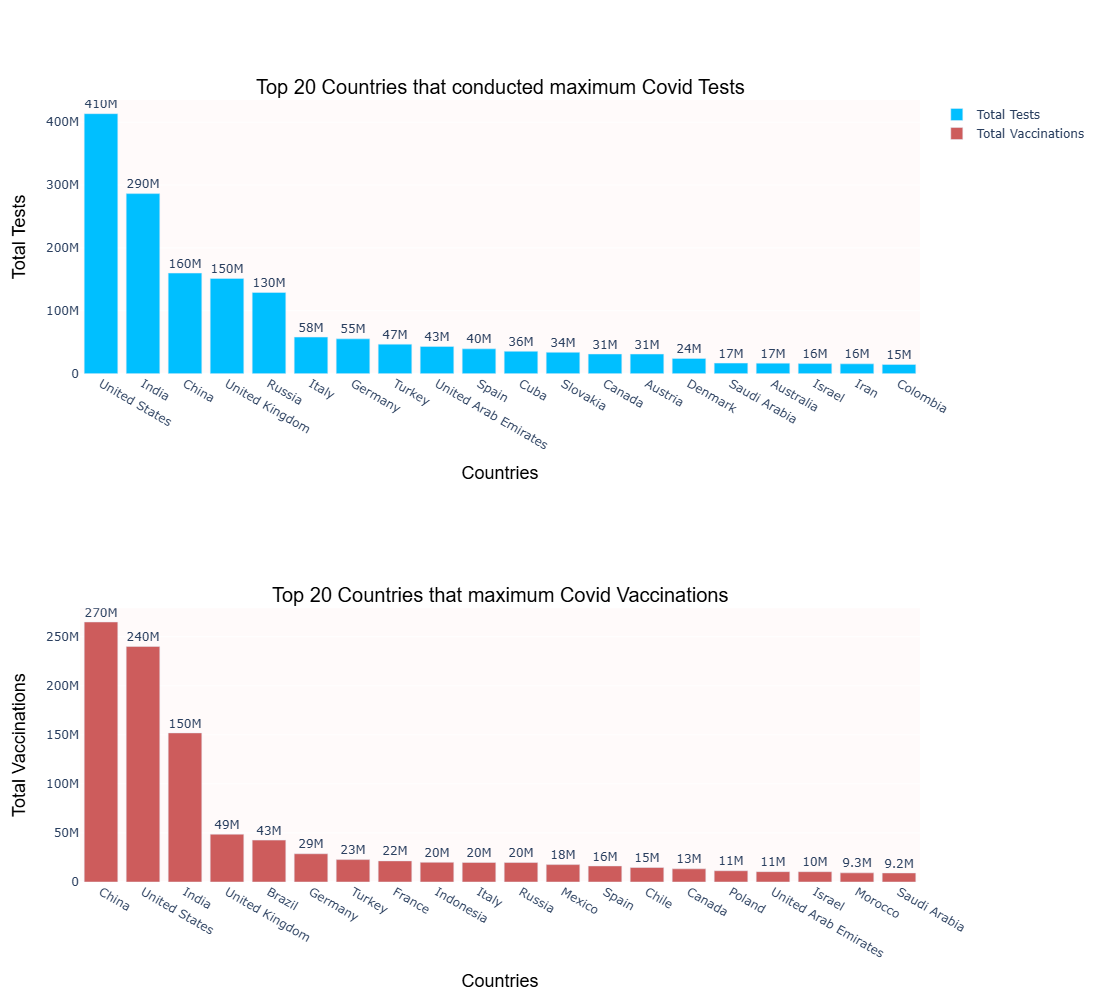

In [39]:
fig11 = make_subplots(rows = 2,cols=1,
                      vertical_spacing=0.3,
                     subplot_titles=('Top 20 Countries that conducted maximum Covid Tests',
                                   'Top 20 Countries that maximum Covid Vaccinations' ))
fig11.add_trace(go.Bar(x=tests['Country'],
                       y=tests['Tests'],
                      marker_color='deepskyblue',
                      name='Total Tests',
                      text=tests['Tests']),
               row=1,col=1)

fig11.add_trace(go.Bar(x=vaccinations['Country'],
                       y=vaccinations['Vaccinations'],
                       marker_color='indianred',
                       name='Total Vaccinations',
                       text=vaccinations['Vaccinations']),
                row=2,col=1)

fig11.update_layout(height=1000,
                   plot_bgcolor="Snow",
                   yaxis_title=dict(text='Total Tests',font=dict(size=18,color='black',family='Arial')),
                   yaxis2_title=dict(text='Total Vaccinations',font=dict(size=18,color='black',family='Arial')),
                   xaxis_title=dict(text='Countries',font=dict(size=18,color='black',family='Arial')),
                   xaxis2_title=dict(text='Countries',font=dict(size=18,color='black',family='Arial')))

fig11.update_traces(texttemplate='%{text:.2s}',
                   textposition='outside')

for annotation in fig11['layout']['annotations']:
    annotation['font']=dict(size=20,color='black',family='Arial')

fig11.show()


## Tests and Vaccinations in continents

In [40]:
continent_tests_vaccinations = df2_cleaned.groupby(['location'])[['continent','total_tests','total_vaccinations']].last().reset_index()
continent_tests_vaccinations

location      continent  total_tests  total_vaccinations
0    Afghanistan           Asia          NaN            240000.0
1        Albania         Europe     610865.0            476903.0
2        Algeria         Africa          NaN             75000.0
3        Andorra         Europe     180633.0             26414.0
4         Angola         Africa          NaN            456349.0
..           ...            ...          ...                 ...
205    Venezuela  South America          NaN            250000.0
206      Vietnam           Asia    2482302.0            506435.0
207        Yemen           Asia          NaN                 NaN
208       Zambia         Africa    1394900.0             26580.0
209     Zimbabwe         Africa     488826.0            500342.0

[210 rows x 4 columns]

In [41]:
continent_tests_vaccinations = continent_tests_vaccinations.groupby(['continent'])[['total_tests','total_vaccinations']].sum().reset_index()
continent_tests_vaccinations.columns = ['Continents','Tests','Vaccinations']
continent_tests_vaccinations

Continents        Tests  Vaccinations
0         Africa   32267468.0    17827619.0
1           Asia  736598941.0   536861818.0
2         Europe  652459953.0   224757173.0
3  North America  493789008.0   276667743.0
4        Oceania   18864994.0     2487869.0
5  South America   51062308.0    75731252.0

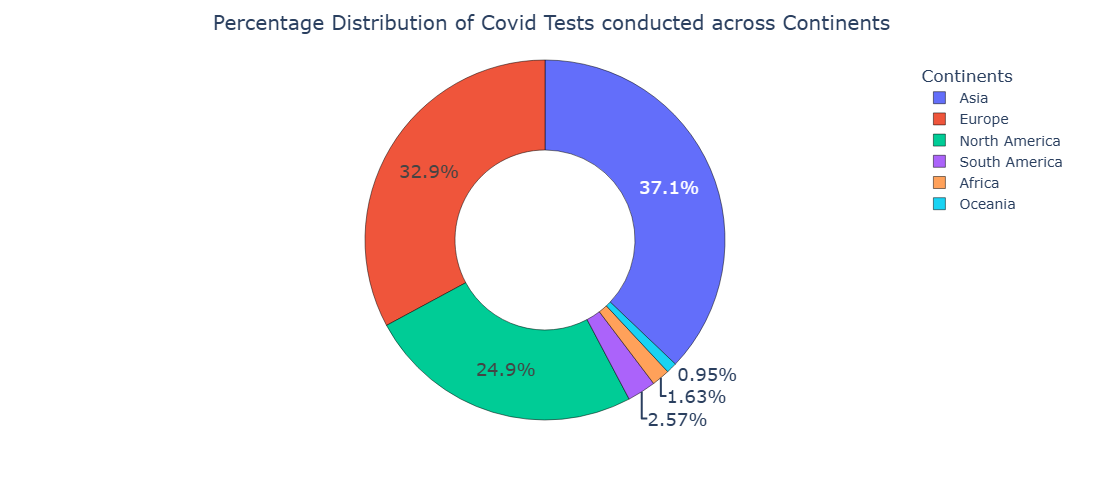

In [42]:
fig12 = px.pie(continent_tests_vaccinations,
               names='Continents',
               values='Tests',
              hole=0.5)
fig12.update_layout(title='Percentage Distribution of Covid Tests conducted across Continents',
                    title_x=0.5,
                    title_font_size=20,
                   legend_title='Continents',
                   legend_font_size=14,
                   height=500)

fig12.update_traces(textfont_size=18,
                    marker=dict(line=dict(width=0.5,color='black')))


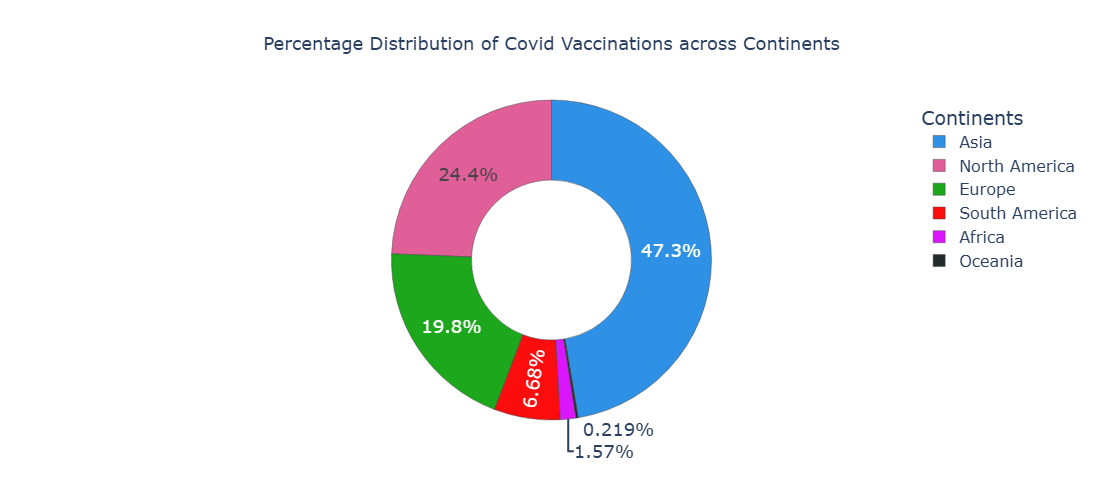

In [43]:
fig13 = px.pie(continent_tests_vaccinations,
               names='Continents',
               values='Vaccinations',
               hole=0.5,
               title='Percentage Distribution of Covid Vaccinations across Continents',
              color_discrete_sequence=px.colors.qualitative.Dark24)

fig13.update_layout(height=500,
                    title_x=0.5,
                   legend_title='Continents',
                   legend_font_size=16,
                   title_font_size=18)

fig13.update_traces(textfont_size=18,
                    marker=dict(line=dict(width=0.5)))

## Tests and Vaccinations across Asia

In [44]:
asia_df2 = df2[df2['continent'] == 'Asia']
asia_df2

iso_code continent     location        date  new_tests  total_tests  \
0          AFG      Asia  Afghanistan  24-02-2020        NaN          NaN   
1          AFG      Asia  Afghanistan  25-02-2020        NaN          NaN   
2          AFG      Asia  Afghanistan  26-02-2020        NaN          NaN   
3          AFG      Asia  Afghanistan  27-02-2020        NaN          NaN   
4          AFG      Asia  Afghanistan  28-02-2020        NaN          NaN   
...        ...       ...          ...         ...        ...          ...   
84350      YEM      Asia        Yemen  26-04-2021        NaN          NaN   
84351      YEM      Asia        Yemen  27-04-2021        NaN          NaN   
84352      YEM      Asia        Yemen  28-04-2021        NaN          NaN   
84353      YEM      Asia        Yemen  29-04-2021        NaN          NaN   
84354      YEM      Asia        Yemen  30-04-2021        NaN          NaN   

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                           NaN                     NaN                 NaN   
1                           NaN                     NaN                 NaN   
2                           NaN                     NaN                 NaN   
3                           NaN                     NaN                 NaN   
4                           NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
84350                       NaN                     NaN                 NaN   
84351                       NaN                     NaN                 NaN   
84352                       NaN                     NaN                 NaN   
84353                       NaN                     NaN                 NaN   
84354                       NaN                     NaN                 NaN   

       new_tests_smoothed_per_thousand  ...  gdp_per_capita  extreme_poverty  \
0                                  NaN  ...        1803.987              NaN   
1                                  NaN  ...        1803.987              NaN   
2                                  NaN  ...        1803.987              NaN   
3                                  NaN  ...        1803.987              NaN   
4                                  NaN  ...        1803.987              NaN   
...                                ...  ...             ...              ...   
84350                              NaN  ...        1479.147             18.8   
84351                              NaN  ...        1479.147             18.8   
84352                              NaN  ...        1479.147             18.8   
84353                              NaN  ...        1479.147             18.8   
84354                              NaN  ...        1479.147             18.8   

      cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
0                   597.029                 9.59             NaN   
1                   597.029                 9.59             NaN   
2                   597.029                 9.59             NaN   
3                   597.029                 9.59             NaN   
4                   597.029                 9.59             NaN   
...                     ...                  ...             ...   
84350               495.003                 5.35             7.6   
84351               495.003                 5.35             7.6   
84352               495.003                 5.35             7.6   
84353               495.003                 5.35             7.6   
84354               495.003                 5.35             7.6   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0               NaN                  37.746                         0.5   
1               NaN                  37.746                         0.5   
2               NaN                  37.746                         0.5   
3               NaN                  37.746           

In [45]:
asia_tests_vaccinations = asia_df2.groupby(['location'])[['total_tests','total_vaccinations']].last().reset_index()
asia_tests_vaccinations.columns = ['Country','Tests','Vaccinations']
asia_tests_vaccinations

Country        Tests  Vaccinations
0            Afghanistan          NaN      240000.0
1                Armenia     979060.0         565.0
2             Azerbaijan    3229867.0     1488218.0
3                Bahrain    4079066.0     1235170.0
4             Bangladesh    5444255.0     8625350.0
5                 Bhutan     698560.0      480422.0
6                 Brunei          NaN       10715.0
7               Cambodia          NaN     2284788.0
8                  China  160000000.0   265064000.0
9                Georgia    4156000.0       45338.0
10             Hong Kong   12935888.0     1413622.0
11                 India  286392086.0   151998107.0
12             Indonesia    9769757.0    20068537.0
13                  Iran   15693870.0     1068123.0
14                  Iraq    9244746.0      298377.0
15                Israel   16101570.0    10497355.0
16                 Japan   11154934.0     3489719.0
17                Jordan    6668395.0      919922.0
18            Kazakhstan   10128374.0     1559836.0
19                Kuwait    2307415.0     1000000.0
20            Kyrgyzstan          NaN        2100.0
21                  Laos          NaN      184387.0
22               Lebanon          NaN      461726.0
23                 Macao          NaN      102444.0
24              Malaysia    9333787.0     1421664.0
25              Maldives     734038.0      397875.0
26              Mongolia    2675590.0     1208619.0
27               Myanmar    2482290.0     1040000.0
28                 Nepal    2445968.0     2091511.0
29       Northern Cyprus          NaN      109490.0
30                  Oman          NaN      315691.0
31              Pakistan   11788126.0     2100000.0
32             Palestine          NaN      213989.0
33           Philippines   11022790.0     1919851.0
34                 Qatar    1899091.0     1556203.0
35          Saudi Arabia   16838619.0     9214983.0
36             Singapore    9536636.0     2213888.0
37           South Korea    8765781.0     3554402.0
38             Sri Lanka    2743851.0      953461.0
39                 Syria          NaN        2500.0
40                Taiwan     207488.0       57884.0
41            Tajikistan          NaN           NaN
42              Thailand    4351770.0     1477078.0
43                 Timor          NaN        2629.0
44                Turkey   46996712.0    22816891.0
45  United Arab Emirates   43310259.0    10547584.0
46            Uzbekistan          NaN      600369.0
47               Vietnam    2482302.0      506435.0
48                 Yemen          NaN           NaN

In [46]:
asia_tests = asia_tests_vaccinations.nlargest(20,'Tests')
asia_tests = asia_tests[['Country','Tests']]
asia_tests = asia_tests.reset_index(drop=True)   
asia_tests

Country        Tests
0                  India  286392086.0
1                  China  160000000.0
2                 Turkey   46996712.0
3   United Arab Emirates   43310259.0
4           Saudi Arabia   16838619.0
5                 Israel   16101570.0
6                   Iran   15693870.0
7              Hong Kong   12935888.0
8               Pakistan   11788126.0
9                  Japan   11154934.0
10           Philippines   11022790.0
11            Kazakhstan   10128374.0
12             Indonesia    9769757.0
13             Singapore    9536636.0
14              Malaysia    9333787.0
15                  Iraq    9244746.0
16           South Korea    8765781.0
17                Jordan    6668395.0
18            Bangladesh    5444255.0
19              Thailand    4351770.0

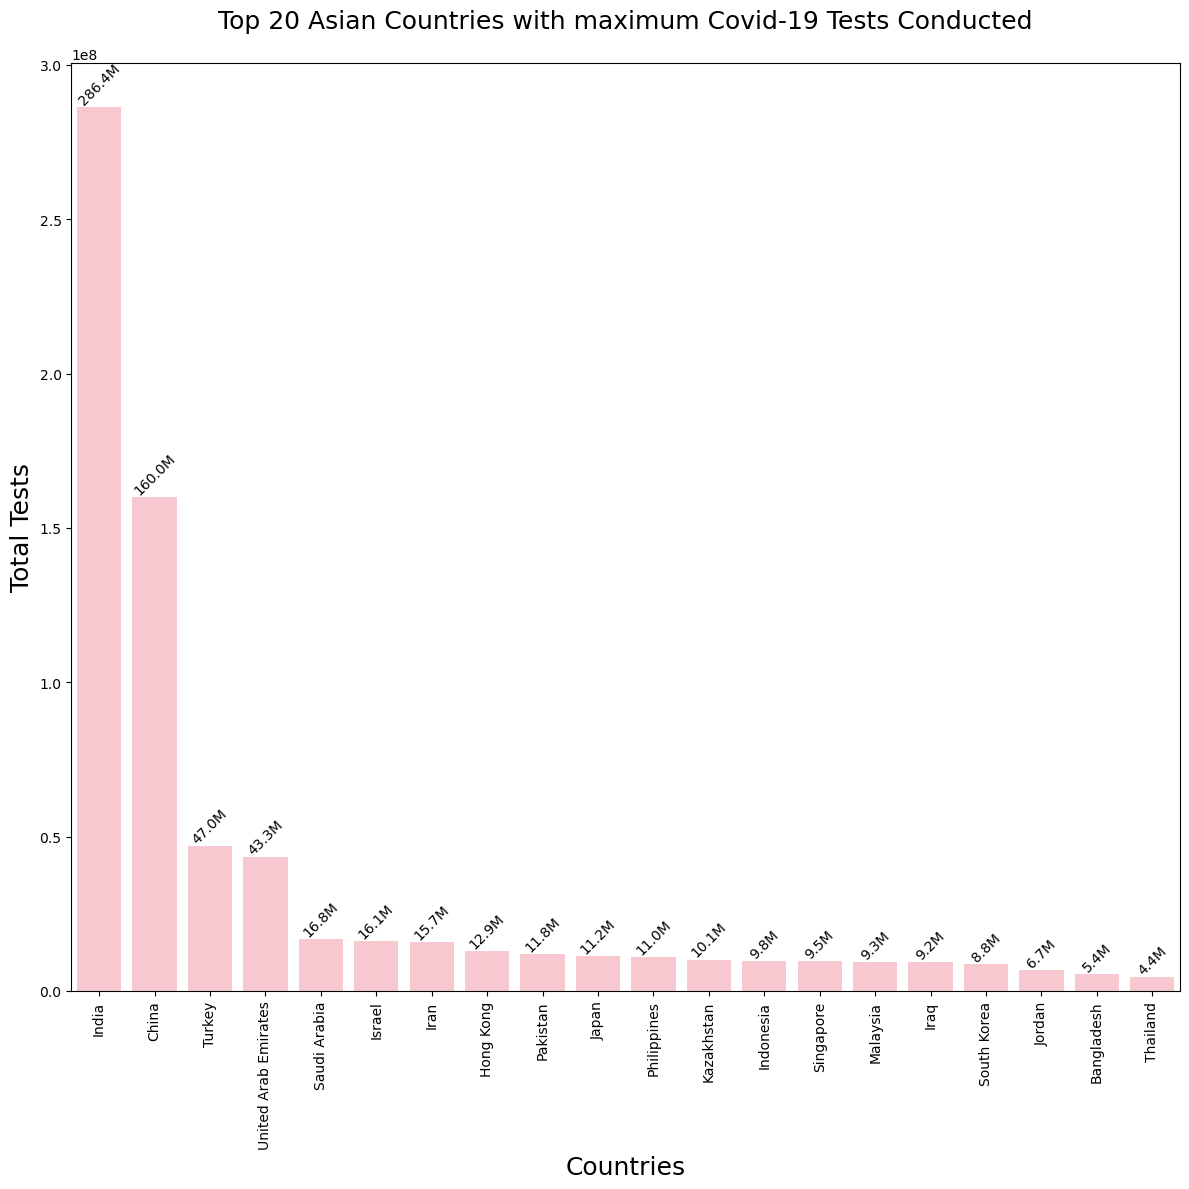

In [47]:
plt.figure(figsize=(12,12))
bars=sns.barplot(asia_tests,
            x='Country',
            y='Tests',color="Pink")
plt.title("Top 20 Asian Countries with maximum Covid-19 Tests Conducted",fontsize=18,pad=25)
plt.xlabel("Countries",fontsize=18)
plt.ylabel("Total Tests",fontsize=18)
plt.xticks(rotation=90)

plt.tight_layout()
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height/1e6:.1f}M',  
        ha='center',
        va='bottom',
        fontsize=10,
        rotation=45
    )

## Top 20 Asian countries with maximum vaccinations held

In [48]:
asia_vaccinations = asia_tests_vaccinations.nlargest(20,'Vaccinations')
asia_vaccinations = asia_vaccinations[['Country','Vaccinations']]
asia_vaccinations = asia_vaccinations.reset_index(drop=True)
asia_vaccinations

Country  Vaccinations
0                  China   265064000.0
1                  India   151998107.0
2                 Turkey    22816891.0
3              Indonesia    20068537.0
4   United Arab Emirates    10547584.0
5                 Israel    10497355.0
6           Saudi Arabia     9214983.0
7             Bangladesh     8625350.0
8            South Korea     3554402.0
9                  Japan     3489719.0
10              Cambodia     2284788.0
11             Singapore     2213888.0
12              Pakistan     2100000.0
13                 Nepal     2091511.0
14           Philippines     1919851.0
15            Kazakhstan     1559836.0
16                 Qatar     1556203.0
17            Azerbaijan     1488218.0
18              Thailand     1477078.0
19              Malaysia     1421664.0

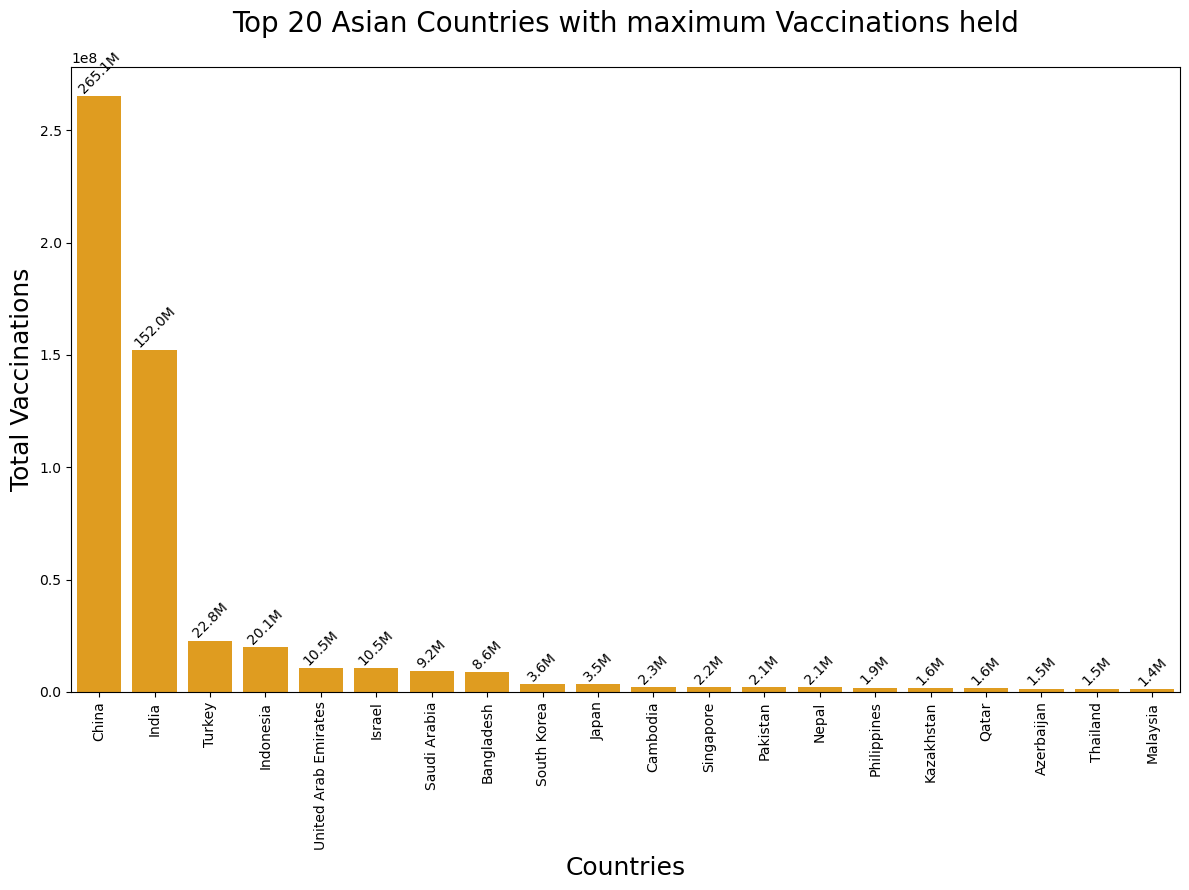

In [49]:
plt.figure(figsize=(12,9))
bars=sns.barplot(asia_vaccinations,
             x='Country',
             y='Vaccinations',
            color='orange')

plt.title('Top 20 Asian Countries with maximum Vaccinations held',fontsize=20,pad=25)
plt.xlabel('Countries',fontsize=18)
plt.ylabel('Total Vaccinations',fontsize=18)
plt.xticks(rotation=90)
plt.tight_layout()

for bar in bars.patches:
    height=bar.get_height()
    bars.text(
        bar.get_x()+bar.get_width() /2,
        height,
        f'{height/1e6:.1f}M',  
        ha='center',
        va='bottom',
        fontsize=10,
        rotation=45
    )